### Manish Sidhenkiwar
- (+91- 8600001284 )
- https://www.linkedin.com/in/msid02/

## The Data

LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

LendingClub is the world's largest peer-to-peer lending platform.

### info on dataset

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. 


-----

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read column description
pd.read_csv('../DATA/lending_club_info.csv')

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [3]:
# LoanStatNew as index not a column
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [4]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [5]:
print(data_info.loc['revol_util'])

Description    Revolving line utilization rate, or the amount...
Name: revol_util, dtype: object


In [6]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [7]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [10]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

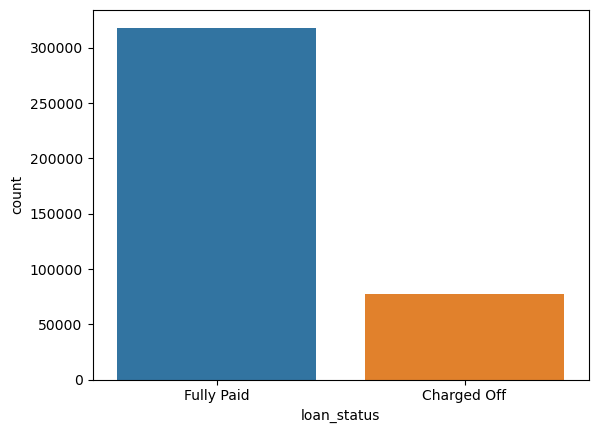

In [12]:
# Always check countplot for categorical target label
sns.countplot(data = df,x='loan_status')

In [13]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

In [14]:
#AS YOU CAN SEE,DATASET IS A BIT UNBALANCED TOWARDS FULLY PAID LOANS.

(0.0, 45000.0)

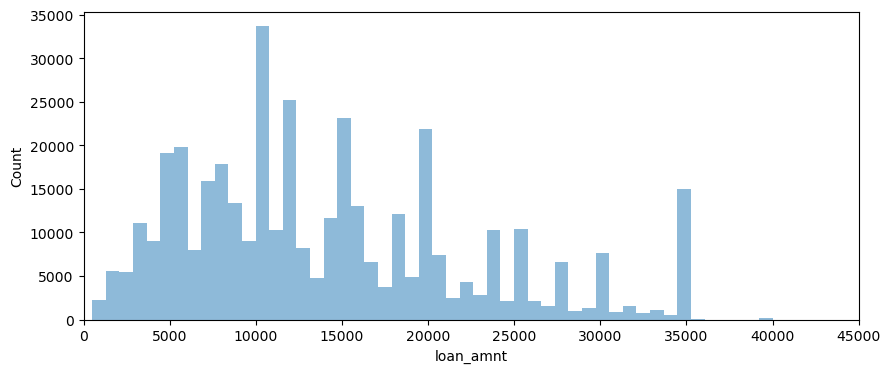

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(data=df,x='loan_amnt',bins= 50,lw=0,alpha=0.5)
plt.xlim(0,45000)

**Let's explore correlation between the continuous feature variables. Lets calculate the correlation between all continuous numeric variables using .corr() method.**

In [16]:
# CODE HERE
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\1487525557.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\2961746137.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = df.corr(),cmap='viridis',annot=True)


<Axes: >

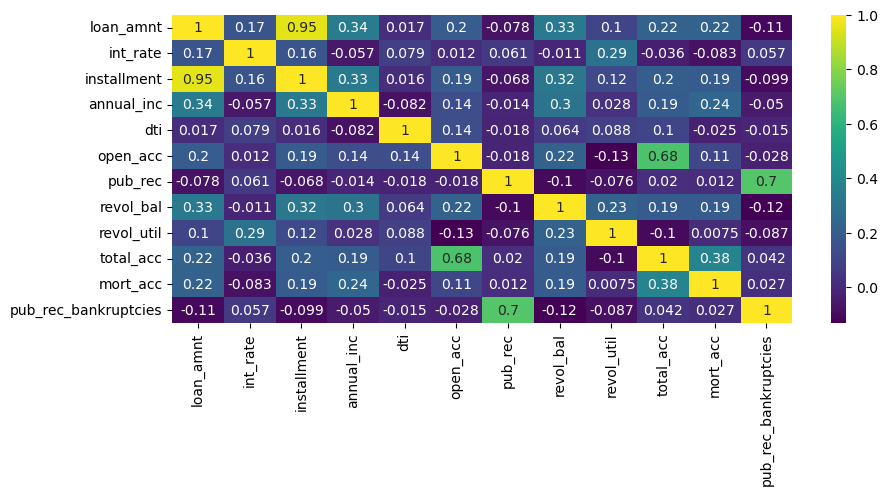

In [17]:
plt.figure(figsize=(10,4))
sns.heatmap(data = df.corr(),cmap='viridis',annot=True)

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Almost perfect correlation with the "installment" feature. Lets explore this feature further.**

In [20]:
data_info.loc['installment']['Description']

'The monthly payment owed by the borrower if the loan originates.'

In [21]:
data_info.loc['loan_amnt']['Description']

'The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.'

<Axes: xlabel='installment', ylabel='loan_amnt'>

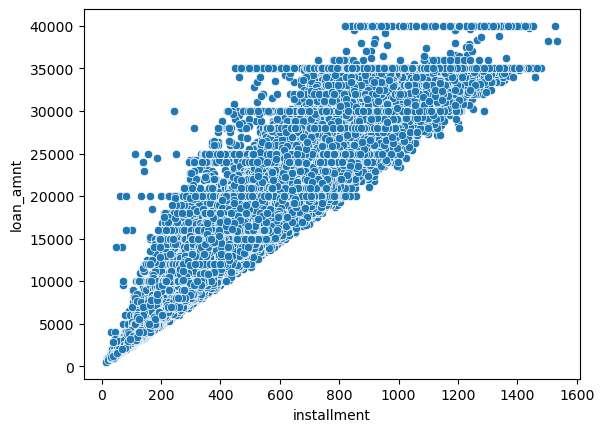

In [22]:
sns.scatterplot(data=df,x= 'installment',y='loan_amnt')

**boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

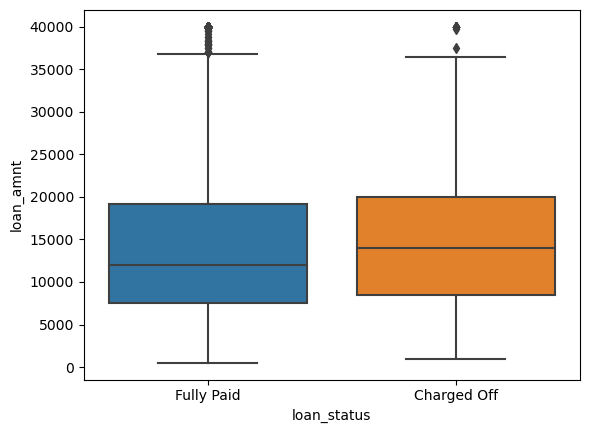

In [23]:
sns.boxplot(data=df,x='loan_status',y='loan_amnt')

**summary statistics for the loan amount, grouped by the loan_status.**

In [24]:
round(df.groupby(by='loan_status').describe()['loan_amnt'],2)

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.30,8505.09,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.88,8302.32,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades**

In [25]:
np.sort(df['grade'].unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [26]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [27]:
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

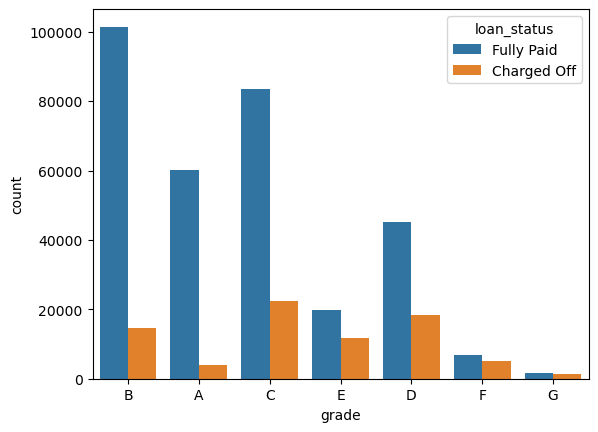

In [28]:
sns.countplot(data=df,x=df['grade'],hue='loan_status')

**count plot per subgrade.Lets explore both all loans made per subgrade as well being separated based on the loan_status.**

''

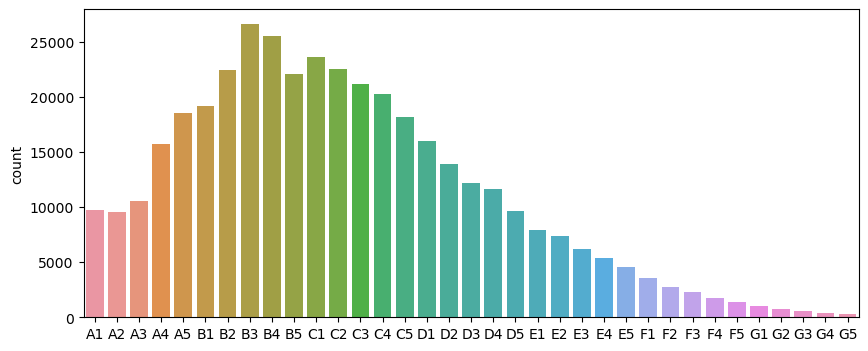

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=np.sort(df['sub_grade']))
;

''

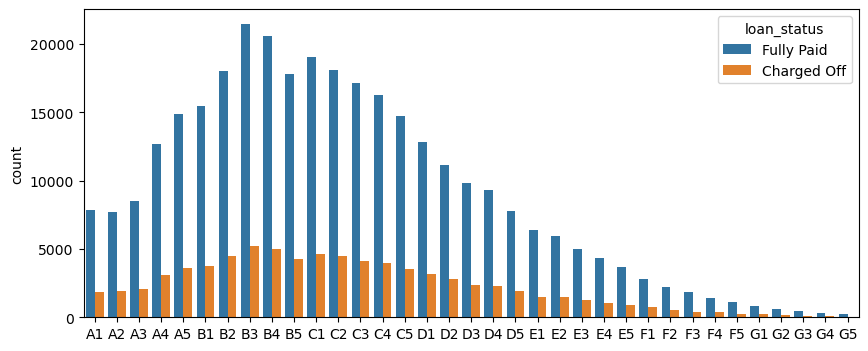

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=np.sort(df['sub_grade']),hue='loan_status')
;

**It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

In [31]:
new_df=df[df['sub_grade'].isin(['F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])]

<Axes: xlabel='sub_grade', ylabel='count'>

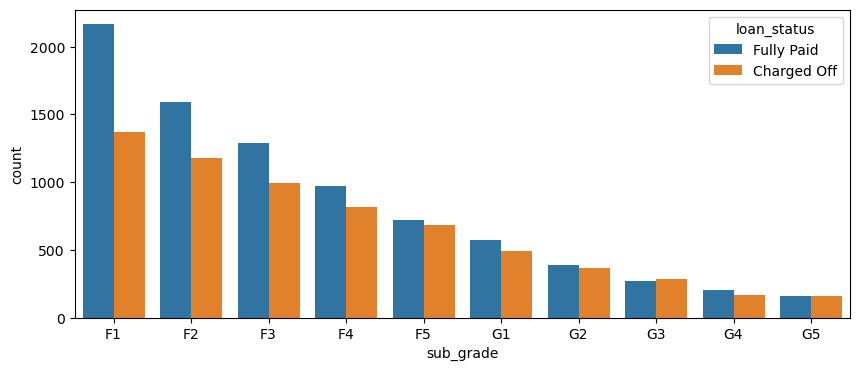

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(data=new_df,x=new_df['sub_grade'].sort_values(ascending=True),hue='loan_status')

**Lets create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [33]:
def convert(loan):
    if loan == 'Fully Paid':
        return 1
    else:
        return 0

In [34]:
df['loan_status'].apply(convert)

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64

In [35]:
df['loan_status'].iloc[4]

'Charged Off'

In [36]:
df['loan_repaid'] = df['loan_status'].apply(convert)

In [37]:
df['loan_repaid'].unique()

array([1, 0], dtype=int64)

In [38]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [39]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


In [ ]:
#or simply replace or map values
#df['loan_repaid']= df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [110]:
df.head(4)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1


**bar plot showing the correlation of the numeric features to the new loan_repaid column.**

In [40]:
df.corr()['loan_repaid'].sort_values()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\2678981544.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values()


int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_repaid             1.000000
Name: loan_repaid, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\1418787016.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().plot(kind='bar')


<Axes: >

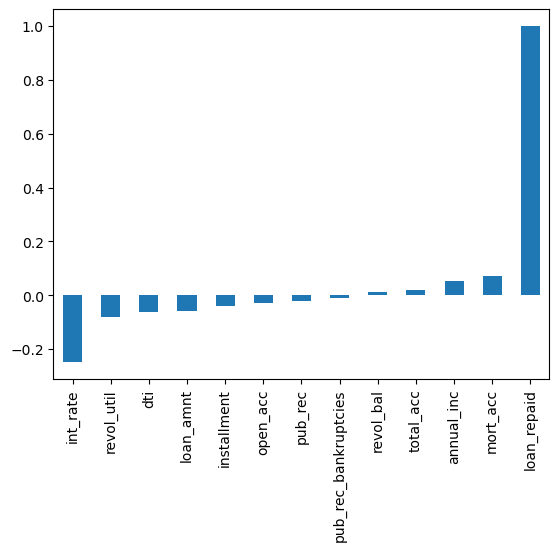

In [41]:
df.corr()['loan_repaid'].sort_values().plot(kind='bar')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\682261521.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')


<Axes: >

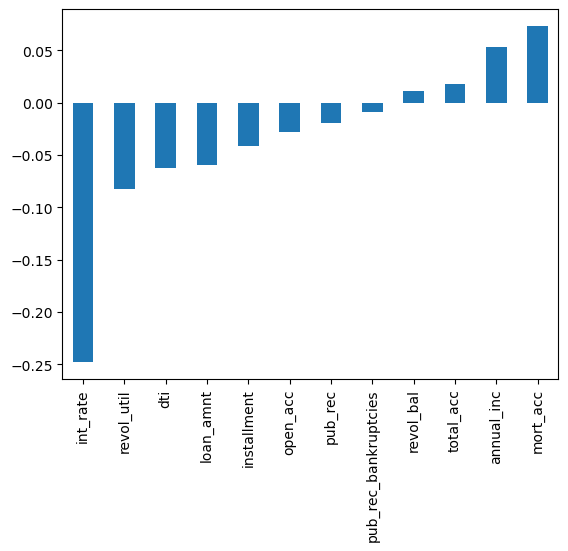

In [42]:
#remove loan repaid
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

---
---
# Data PreProcessing

**Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [44]:
#all my string objects
df.select_dtypes(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,Marketing,10+ years,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B,B5,Credit analyst,4 years,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B,B3,Statistician,< 1 year,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A,A2,Client Advocate,6 years,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C,C5,Destiny Management Inc.,9 years,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,licensed bankere,2 years,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C,C1,Agent,5 years,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B,B1,City Carrier,10+ years,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [45]:
#all my numeric datatypes
df.select_dtypes(exclude='object')

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,loan_repaid
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,1
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,1
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,1
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0,1
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0,1
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0,1
396028,21000.0,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,20.0,5.0,0.0,1


# Missing Data

**Let's explore this missing data columns.**

**length of the dataframe**

In [47]:
df.shape[0]

396030

**Lets Create a Series that displays the total count of missing values per column.**

In [48]:
#check for null values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [49]:
round((df.isnull().sum()/len(df) * 100),2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
loan_repaid             0.00
dtype: float64

**Let's examine emp_title and emp_length to see whether it will be okay to drop them.**

In [50]:
print(data_info.loc['emp_title']['Description'])
print('\n')
print(data_info.loc['emp_length']['Description'])

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Unique employment job titles**

In [51]:
len(df['emp_title'].unique())

173106

In [52]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [53]:
df=df.drop('emp_title',axis=1)

**Count plot of the emp_length feature column.**

In [54]:
df['emp_length'].dropna().unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year'],
      dtype=object)

In [ ]:
sorted(df['emp_length'].dropna().unique())

In [75]:
# set and order categories
#df["Col"] = df["Col"].cat.set_categories(category_order_list, ordered=True)
#df["Year"] = df["Year"].astype("category")

df['emp_length'] = df['emp_length'].astype('category')
df['emp_length1']=df['emp_length'].cat.set_categories(['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years',
                                     '7 years','8 years', '9 years','10+ years'],ordered = True)

<Axes: xlabel='emp_length1', ylabel='count'>

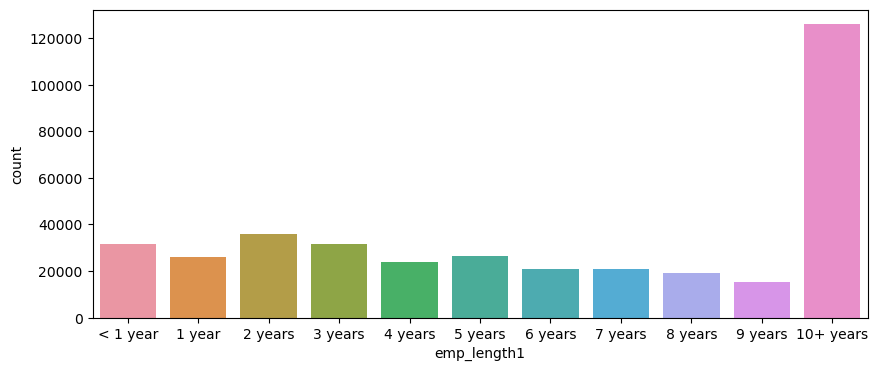

In [76]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x=df['emp_length1'])

<Axes: xlabel='emp_length', ylabel='count'>

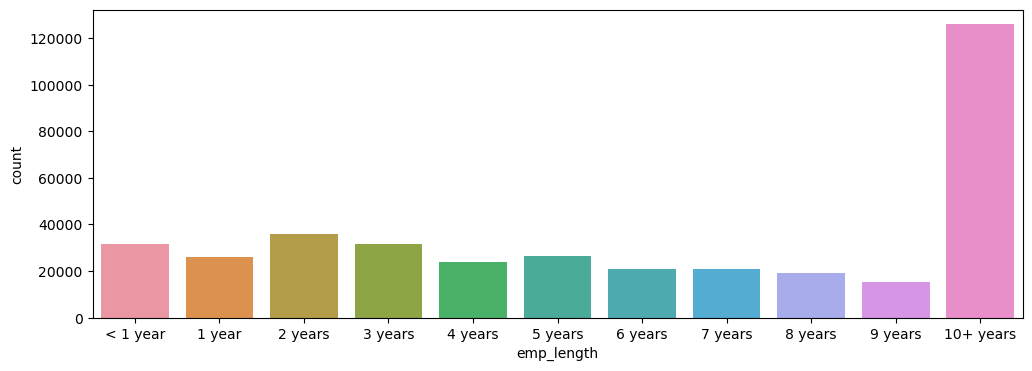

In [55]:
#or 
emp_length_order= ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]
plt.figure(figsize=(12,4))
sns.countplot(data=df,x='emp_length',order=emp_length_order)

**countplot with a hue separating Fully Paid vs Charged Off**

In [56]:
(df['emp_length'].unique())

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

<Axes: xlabel='emp_length1', ylabel='count'>

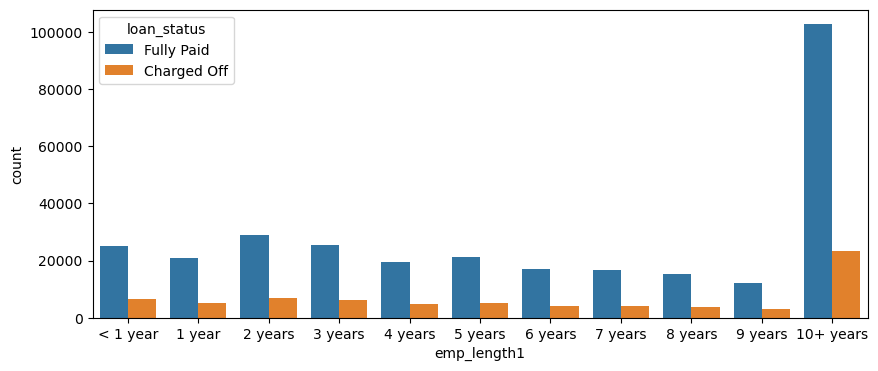

In [77]:
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='emp_length1',hue='loan_status')

In [86]:
df=df.drop('emp_length1',axis=1)

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series.Visualize it with a [bar plot]**

In [59]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [73]:
#what we want is the percentage of charge offs per category.
df[df['loan_status']=='Charged Off'].groupby('emp_length').count()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
emp_length,,,,,,,,,,,,,,,,,,,,,
1 year,5154,5154,5154,5154,5154,5154,5154,5154,5154,5154,...,5154,5154,5148,5154,5154,5154,4732,5141,5154,5154
10+ years,23215,23215,23215,23215,23215,23215,23215,23215,23215,23215,...,23215,23215,23200,23215,23215,23215,21883,23198,23215,23215
2 years,6924,6924,6924,6924,6924,6924,6924,6924,6924,6924,...,6924,6924,6918,6924,6924,6924,6383,6916,6924,6924
3 years,6182,6182,6182,6182,6182,6182,6182,6182,6182,6182,...,6182,6182,6179,6182,6182,6182,5660,6179,6182,6182
4 years,4608,4608,4608,4608,4608,4608,4608,4608,4608,4608,...,4608,4608,4603,4608,4608,4608,4140,4598,4608,4608
5 years,5092,5092,5092,5092,5092,5092,5092,5092,5092,5092,...,5092,5092,5088,5092,5092,5092,4666,5090,5092,5092
6 years,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,...,3943,3943,3942,3943,3943,3943,3639,3940,3943,3943
7 years,4055,4055,4055,4055,4055,4055,4055,4055,4055,4055,...,4055,4055,4052,4055,4055,4055,3770,4052,4055,4055
8 years,3829,3829,3829,3829,3829,3829,3829,3829,3829,3829,...,3829,3829,3823,3829,3829,3829,3609,3826,3829,3829


In [64]:
# lets grab for loan status only
df[df['loan_status']=='Charged Off'].groupby(by='emp_length').count()['loan_status']

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [72]:
#for fully paid
df[df['loan_status']== 'Fully Paid'].groupby(by='emp_length').count()['loan_status']

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [66]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [74]:
fully_paid =  df[df['loan_status']== 'Fully Paid'].groupby(by='emp_length').count()['loan_status']
charged_off = df[df['loan_status']=='Charged Off'].groupby(by='emp_length').count()['loan_status']

In [245]:
31725/len(df)

0.08010756760851451

In [78]:
fully_paid

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_status, dtype: int64

In [79]:
charged_off

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_status, dtype: int64

In [80]:
#lets divide charged off with fully paid to get our answer
charged_off/fully_paid

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

In [81]:
#percent of people not paying back
total_len = charged_off/fully_paid
total_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

<Axes: xlabel='emp_length'>

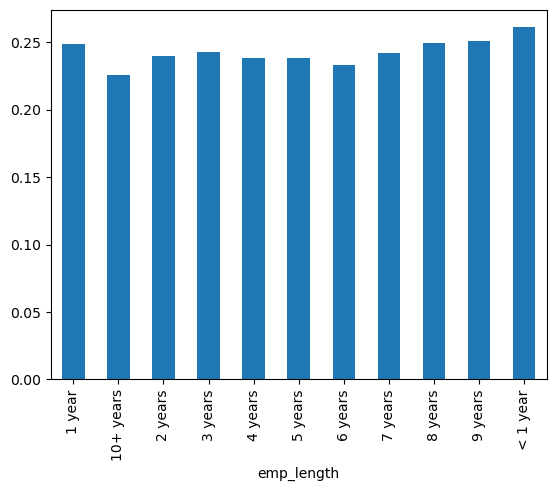

In [82]:
total_len.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths.Drop the emp_length column.**

In [2]:
#df=df.drop('emp_length',axis=1)

**Revisit the DataFrame to see what feature columns still have missing data.**

In [88]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Review the title column vs the purpose column. Is this repeated info**

In [247]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [248]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [250]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [ ]:
#BOTH ARE SAME

**The title column is simply a string subcategory/description of the purpose column. Drop the title column.**

In [89]:
df = df.drop('title',axis=1)

**Find out what the mort_acc feature represents**

In [90]:
data_info.loc['mort_acc']['Description']

'Number of mortgage accounts.'

**value_counts of the mort_acc column.**

In [91]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [92]:
print('Correlation with the mort_acc column')
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\4162137961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [93]:
print('Mean of mort_acc column per total_acc')
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\1884893229.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.

In [96]:
#from above
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

C:\Users\Admin\AppData\Local\Temp\ipykernel_6024\2830540679.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg = df.groupby('total_acc').mean()['mort_acc']


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [94]:
df['mort_acc'].fillna(df['total_acc'].mean)

0                                                       0.0
1                                                       3.0
2                                                       0.0
3                                                       0.0
4                                                       1.0
                                ...                        
396025                                                  0.0
396026                                                  1.0
396027                                                  0.0
396028                                                  5.0
396029    <bound method NDFrame._add_numeric_operations....
Name: mort_acc, Length: 396030, dtype: object

In [99]:
np.isnan(df['mort_acc'])

0         False
1         False
2         False
3         False
4         False
          ...  
396025    False
396026    False
396027    False
396028    False
396029     True
Name: mort_acc, Length: 396030, dtype: bool

In [100]:
def fill_mort_acc(total_acc,mort_acc):
    #check for null values
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]   #mean value per emp_length category inside totalacc 
    else:
        return mort_acc

In [101]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [103]:
df['mort_acc'].isnull().sum()

0

In [104]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.**

In [105]:
df = df.dropna()

In [106]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [107]:
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

**Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [120]:
data_info.loc['term']['Description']

'The number of payments on the loan. Values are in months and can be either 36 or 60.'

In [110]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [130]:
df['term'].unique()  
#Note the gap before strings in parenthesis.

array([' 36 months', ' 60 months'], dtype=object)

In [132]:
df['term']= df['term'].map({' 36 months': 36,' 60 months': 60})

In [129]:
#df['term'].replace(to_replace=[' 36 months',' 60 months'],value=[36,60])

array([36, 60], dtype=int64)

In [134]:
df['term'].unique()

array([36, 60], dtype=int64)

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [136]:
df = df.drop('grade',axis=1)

In [138]:
#df['grade']

**Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [139]:
#ONE HOT ENCODING
pd.get_dummies(data=df['sub_grade'],drop_first=True)

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
dummies = pd.get_dummies(data=df['sub_grade'],drop_first=True)

In [144]:
#lets merge it to original df
df= pd.concat([df,dummies],axis=1)

In [146]:
#drop sub_grade as we won't need it now
df = df.drop('sub_grade',axis=1)

In [150]:
#Now check string columns(object)
df.select_dtypes(include='object').columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [152]:
pd.get_dummies(data=df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
396026,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396027,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
396028,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [153]:
dummies = pd.get_dummies(data=df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

In [155]:
#combine & drop columns together
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [156]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

### home_ownership
**Review the value_counts for the home_ownership column.**

In [158]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Convert these to dummy variables, but [replace]NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [159]:
#first replace or map
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [162]:
#check if its adding up or not
df['home_ownership'].replace(to_replace=['ANY', 'NONE'],value='OTHER').value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [163]:
df['home_ownership'] = df['home_ownership'].replace(to_replace=['ANY', 'NONE'],value='OTHER')

In [165]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [166]:
pd.get_dummies(data=df['home_ownership'],drop_first=True)

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [167]:
dummies = pd.get_dummies(data=df['home_ownership'],drop_first=True)

In [169]:
#drop as we have saved its info on dummies dataframe
df = df.drop('home_ownership',axis=1)

In [170]:
df = pd.concat([df,dummies],axis=1)

In [171]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

### address
**Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [178]:
data_info.loc['zip_code']['Description']

'The first 3 numbers of the zip code provided by the borrower in the loan application.'

In [172]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [179]:
df['address'].iloc[0]

'0174 Michelle Gateway\r\nMendozaberg, OK 22690'

In [180]:
def apply(zipcode):
    return zipcode.split()[0]

In [185]:
str('0174 Michelle Gateway\r\nMendozaberg, OK 22690').split()[0]

'0174'

In [190]:
(df['address'].apply(lambda x:x.split()[-1]).unique())

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [191]:
df['zip_code'] = df['address'].apply(lambda x:x.split()[-1])

In [193]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

**Now make this zip_code column into dummy variables using pandas. Concatenate the result.**

In [195]:
dummies= pd.get_dummies(data=df['zip_code'],drop_first=True)

In [196]:
df = pd.concat([df.drop(['zip_code','address'],axis=1),dummies],axis=1)

In [197]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, lets drop this feature.**

In [198]:
df['issue_d']

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 395219, dtype: object

In [199]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature.**

In [204]:
data_info.loc['earliest_cr_line']['Description']

"The month the borrower's earliest reported credit line was opened"

In [200]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [206]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [207]:
df['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 395219, dtype: datetime64[ns]

In [208]:
def yr(date):
    return date.dt.year

In [210]:
df['earliest_cr_line'].dt.year

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [216]:
(df['earliest_cr_line'].dt.year).astype('int64')

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: int64

In [217]:
df['earliest_cr_year']= (df['earliest_cr_line'].dt.year).astype('int64')

In [218]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

In [219]:
#drop earliest cr line column as we extracted yr as we needed
df = df.drop('earliest_cr_line',axis=1)

In [221]:
df.select_dtypes(include='object').columns

Index(['loan_status'], dtype='object')

In [ ]:
#except for our targe label,all features are turned to numeric.Lets move forward now.EDA is over.

## Train Test Split

**Import train_test_split from sklearn.**

In [222]:
from sklearn.model_selection import train_test_split

**Lets drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [223]:
df['loan_repaid'].unique()  #TARGET LABEL

array([1, 0], dtype=int64)

In [224]:
df = df.drop('loan_status',axis=1)

**Set X and y variables to the .values of the features and label.**

In [225]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [226]:
#ITS A BINARY CLASSIFICATION PROBLEM AS TARGET IS O OR 1 INSIDE LOAN REPAID.

In [227]:
df.shape

(395219, 79)

In [228]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [229]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [230]:
from sklearn.preprocessing import MinMaxScaler

In [231]:
scaler = MinMaxScaler()

In [232]:
X_train = scaler.fit_transform(X_train)

In [233]:
X_test = scaler.transform(X_test)

# Creating the Model

In [240]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam

**Lets build a sequential model. **

In [235]:
df.shape

(395219, 79)

In [241]:
seq_model = Sequential()

seq_model.add(Dense(units=78,activation='relu'))
seq_model.add(Dropout(rate=.2))

seq_model.add(Dense(units=39,activation='relu'))
seq_model.add(Dropout(rate=.2))

seq_model.add(Dense(units=19,activation='relu'))
seq_model.add(Dropout(rate=.2))

seq_model.add(Dense(units=1,activation='sigmoid'))

seq_model.compile(optimizer='adam',loss='binary_crossentropy')

**Fit the model**

In [242]:
seq_model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 20s 14ms/step - loss: 0.2990 - val_loss: 0.2659
Epoch 2/25
1236/1236 [==============================] - 15s 12ms/step - loss: 0.2652 - val_loss: 0.2629
Epoch 3/25
1236/1236 [==============================] - 9s 7ms/step - loss: 0.2625 - val_loss: 0.2629
Epoch 4/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2616 - val_loss: 0.2617
Epoch 5/25
1236/1236 [==============================] - 11s 9ms/step - loss: 0.2608 - val_loss: 0.2614
Epoch 6/25
1236/1236 [==============================] - 13s 11ms/step - loss: 0.2603 - val_loss: 0.2615
Epoch 7/25
1236/1236 [==============================] - 14s 11ms/step - loss: 0.2597 - val_loss: 0.2618
Epoch 8/25
1236/1236 [==============================] - 12s 10ms/step - loss: 0.2595 - val_loss: 0.2621
Epoch 9/25
1236/1236 [==============================] - 12s 10ms/step - loss: 0.2593 - val_loss: 0.2616
Epoch 10/25
1236/1236 [==============================] - 13s 11ms/st

**Save the model.**

In [243]:
from tensorflow.keras.models import load_model

In [244]:
seq_model.save('my_first_knnModel.h5')

# Evaluating Model Performance.

In [258]:
losses = pd.DataFrame(seq_model.history.history)

""


In [259]:
losses

""


<Axes: >

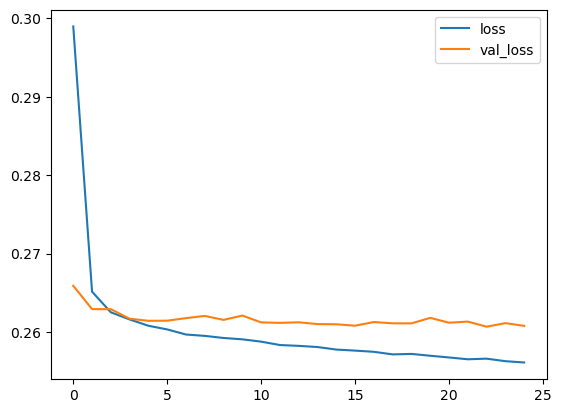

In [246]:
losses.plot()

In [ ]:
#THERE SEEMS TO BE ALOT OF OVERFITTING,LETS USE EARLYSTOPPING CALLBACKS

**predictions from the X_test**

In [248]:
predictions = (seq_model.predict(X_test)>0.5).astype("int32")

2471/2471 [==============================] - 10s 4ms/step


In [260]:
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [249]:
from sklearn.metrics import confusion_matrix,classification_report

In [250]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [251]:
#MODEL IS PERFORMING QUITE GOOD AS OVERALL ACCURACY IS 89% .

In [252]:
confusion_matrix(y_test,predictions)

array([[ 6889,  8769],
       [  131, 63255]], dtype=int64)

In [253]:
#BUT AS YOU CAN SEE,MANY OUTLIERS.

**Test the Model**

In [254]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [262]:
#first reshape to numpy array
new_customer.values

array([2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
       3.0110e+01, 1.6000e+01, 0.0000e+00, 2.7778e+04, 6.5500e+01,
       4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e

In [263]:
len(new_customer.values)

78

In [264]:
#we need two sq brackets
new_customer.values.reshape(1,78)

array([[2.5000e+04, 6.0000e+01, 1.8240e+01, 6.3811e+02, 6.1665e+04,
        3.0110e+01, 1.6000e+01, 0.0000e+00, 2.7778e+04, 6.5500e+01,
        4.6000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

In [266]:
#fianlly lets scale it
new_customer = scaler.transform(new_customer.values.reshape(1,78))
new_customer

array([[0.61538462, 1.        , 0.50331126, 0.40836493, 0.00708257,
        0.0030113 , 0.2       , 0.        , 0.01593446, 0.07340581,
        0.29530201, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.  

In [255]:
#SAVING MODEL
model = load_model('my_first_knnModel.h5')

In [267]:
(model.predict(new_customer)>0.5).astype("int32")

1/1 [==============================] - 0s 251ms/step


array([[1]])

**TASK: Now check, did this person actually end up paying back their loan?**

In [271]:
# USE VARIABLE RANDOM_IND
df.iloc[random_ind]

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 79, dtype: float64

In [272]:
df.iloc[random_ind]['loan_repaid']

1.0

In [273]:
#HE DID REPAID HIS LOAN.OUR MODEL IS GOOD.

In [274]:
#note: IF YOU WANT TO IMPROVE YOUR MODEL,YOU CAN USE EARLYSTOPPING CALLBACKS AS WELL.

### THANKS!